<a href="https://colab.research.google.com/github/erchivox/SIEMFAP-Sistema-Inteligente-de-Ecoturismo-y-Monitoreo-de-Fauna-en-reas-Protegidas-/blob/main/proyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import shutil
import os

# Define the test_dir variable with the desired path
train_dir = "/content/drive/MyDrive/data de animales/dataset_peligro_de_extincion/train"  # Or any other relevant path

train_checkpoints_path = os.path.join(train_dir, ".ipynb_checkpoints")

# Verifica si la carpeta existe y elimínala
if os.path.exists(train_checkpoints_path):
    shutil.rmtree(train_checkpoints_path)
    print("📂 Carpeta '.ipynb_checkpoints' eliminada con éxito.")
else:
    print("✅ No se encontró la carpeta '.ipynb_checkpoints'.")

📂 Carpeta '.ipynb_checkpoints' eliminada con éxito.


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam


#carga del modelo VGG16 preentrenado
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

#congelar las capas del modelo base
for layer in base_model.layers:
    layer.trainable = False

#agregar capas personalizadas encima del modelo base
x = base_model.output
x = Flatten()(x)  # Aplanar la salida
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)  #apagar el 50% de las neuronas y evitar sobreajuste
predictions = Dense(20, activation='softmax')(x)  #estamos decidiendo las categorias que tendra

# Definir el modelo final
model = Model(inputs=base_model.input, outputs=predictions)

# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Crear generadores de datos para entrenamiento y validación
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

validation_datagen = ImageDataGenerator(rescale=1./255)

# Definir las rutas a tus carpetas de entrenamiento y validación (por definir)
train_dir = '/content/drive/MyDrive/data de animales/dataset_peligro_de_extincion/train'
validation_dir = '/content/drive/MyDrive/data de animales/dataset_peligro_de_extincion/test'

# Generador para el conjunto de entrenamiento
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    color_mode="rgb")

# generador para el conjunto de validación
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    color_mode="rgb")

print("Clases en entrenamiento:", train_generator.class_indices)
print("Clases en validación:", validation_generator.class_indices)

# entrenamiento de la ultima capa
model.fit(
    train_generator,
    steps_per_epoch=max(1, train_generator.samples // train_generator.batch_size),
    validation_data=validation_generator,
    validation_steps=max(1, validation_generator.samples // validation_generator.batch_size),
    epochs=30)

# guardar el modelo entrenado
drive.mount('/content/drive')
model.save('/content/drive/MyDrive/Modelos/modelo_clasificador_vgg16_v2.h5')


Found 3414 images belonging to 20 classes.
Found 200 images belonging to 20 classes.
Clases en entrenamiento: {'chuiguire': 0, 'coati andino': 1, 'condor': 2, 'conejo de páramo': 3, 'jaguar': 4, 'jicotea': 5, 'la curraca': 6, 'la lapa': 7, 'leopardo andino': 8, 'mono araña': 9, 'mono nocturno': 10, 'oso andino': 11, 'oso hormiguero gigante': 12, 'pato de torrente': 13, 'paují de yelmo': 14, 'pava andina': 15, 'puma': 16, 'tonina': 17, 'tortuga carey': 18, 'venado andino': 19}
Clases en validación: {'chiguire': 0, 'coati andino': 1, 'condor': 2, 'conejo del paramo': 3, 'jaguar': 4, 'jicotea': 5, 'la curraca': 6, 'la lapa': 7, 'leopardo andino': 8, 'mono araña': 9, 'mono nocturno': 10, 'oso andino': 11, 'oso hormiguero gigante': 12, 'pato de torrente': 13, 'paují de yelmo': 14, 'pava andina': 15, 'puma': 16, 'tonina': 17, 'tortuga carey': 18, 'venado andino': 19}


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
106/106 ━━━━━━━━━━━━━━━━━━━━ 564s 5s/step - accuracy: 0.1343 - loss: 2.9285 - val_accuracy: 0.4427 - val_loss: 2.0752
Epoch 2/30
  1/106 ━━━━━━━━━━━━━━━━━━━━ 16s 162ms/step - accuracy: 0.0938 - loss: 2.4461

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


106/106 ━━━━━━━━━━━━━━━━━━━━ 19s 183ms/step - accuracy: 0.0938 - loss: 2.4461 - val_accuracy: 0.4792 - val_loss: 2.0335
Epoch 3/30
106/106 ━━━━━━━━━━━━━━━━━━━━ 142s 964ms/step - accuracy: 0.3751 - loss: 2.1400 - val_accuracy: 0.6823 - val_loss: 1.4974
Epoch 4/30
106/106 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.5000 - loss: 1.7148 - val_accuracy: 0.6875 - val_loss: 1.4933
Epoch 5/30
106/106 ━━━━━━━━━━━━━━━━━━━━ 106s 629ms/step - accuracy: 0.4881 - loss: 1.7477 - val_accuracy: 0.7240 - val_loss: 1.1991
Epoch 6/30
106/106 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.5938 - loss: 1.2475 - val_accuracy: 0.7292 - val_loss: 1.2056
Epoch 7/30
106/106 ━━━━━━━━━━━━━━━━━━━━ 80s 640ms/step - accuracy: 0.5465 - loss: 1.4971 - val_accuracy: 0.7552 - val_loss: 1.0552
Epoch 8/30
106/106 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.6250 - loss: 1.2986 - val_accuracy: 0.7552 - val_loss: 1.0617
Epoch 9/30
106/106 ━━━━━━━━━━━━━━━━━━━━ 67s 633ms/step - accuracy: 0.6307 - loss: 1.2805 - val_acc

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Found 200 images belonging to 20 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


7/7 ━━━━━━━━━━━━━━━━━━━━ 80s 12s/step


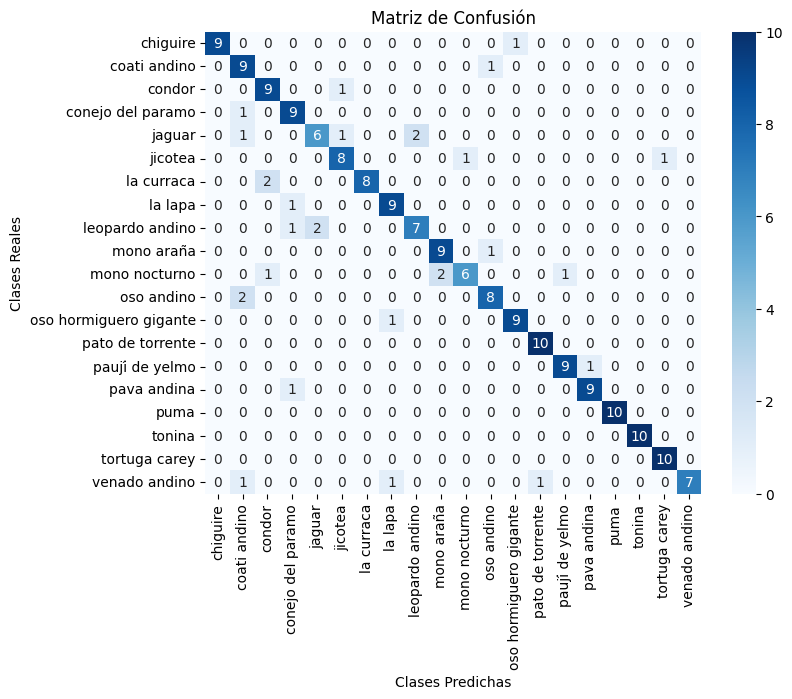

Informe de Clasificación:

                        precision    recall  f1-score   support

              chiguire       1.00      0.90      0.95        10
          coati andino       0.64      0.90      0.75        10
                condor       0.75      0.90      0.82        10
     conejo del paramo       0.75      0.90      0.82        10
                jaguar       0.75      0.60      0.67        10
               jicotea       0.80      0.80      0.80        10
            la curraca       1.00      0.80      0.89        10
               la lapa       0.82      0.90      0.86        10
       leopardo andino       0.78      0.70      0.74        10
           mono araña       0.82      0.90      0.86        10
         mono nocturno       0.86      0.60      0.71        10
            oso andino       0.80      0.80      0.80        10
oso hormiguero gigante       0.90      0.90      0.90        10
      pato de torrente       0.91      1.00      0.95        10
       pauji

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report


model_path = '/content/drive/MyDrive/Modelos/modelo_clasificador_vgg16_v2.h5'
model = load_model(model_path)


test_datagen = ImageDataGenerator(rescale=1./255)


test_dir = '/content/drive/MyDrive/data de animales/dataset_peligro_de_extincion/test'


test_generator = test_datagen.flow_from_directory(
    directory=test_dir,
    target_size=(224, 224),
    batch_size=32,
    color_mode="rgb",
    class_mode='categorical',
    shuffle=False
)


steps = int(np.ceil(test_generator.samples / test_generator.batch_size))


predictions = model.predict(test_generator, steps=steps)


predicted_classes = np.argmax(predictions, axis=1)


true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())


cm = confusion_matrix(true_classes, predicted_classes)


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Clases Predichas")
plt.ylabel("Clases Reales")
plt.title("Matriz de Confusión")
plt.show()


print("Informe de Clasificación:\n")
print(classification_report(true_classes, predicted_classes, target_names=class_labels))


instalacion de tunel https e interfaz

In [4]:
!pip install pyngrok
!pip install streamlit
!pip install streamlit_javascript

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 116.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 115.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 518.4/518.4 kB 25.9 MB/s eta 0:00:00


carga de token para el tunel ngrok. (si tiene su propio autotoken coloquelo pero si no puede usar este pero sera cambiado un tiempo luego de la culminacion del hackaton).

In [5]:
!ngrok authtoken 2u3j0TEwDK6GRvPFXeMY6MY7RZd_6AnBZT22Y5NPLUPSAtahB

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [6]:
# Iniciar la aplicación Streamlit en un puerto específico
from pyngrok import ngrok
import os

# Abre un túnel en el puerto 8501 (el puerto por defecto de Streamlit)
public_url = ngrok.connect(8501)

# Iniciar Streamlit
os.system('!streamlit run /content/drive/MyDrive/front/app25_SN.py')

# Mostrar la URL pública de ngrok
print('La aplicación está corriendo en:', public_url)


La aplicación está corriendo en: NgrokTunnel: "https://8bcc-34-124-148-219.ngrok-free.app" -> "http://localhost:8501"


apertura de pagina

In [7]:
!streamlit run /content/drive/MyDrive/front/app25_SN.py




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.124.148.219:8501



  Stopping...
^C


___